In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  
import seaborn as sns

import yfinance as yf

plt.style.use('ggplot')

In [2]:
# use yfinance api to extract data. 
df = yf.download("AAPL F GM IVV MSFT GOOGL SPY BTC-USD", start="2015-01-02", end="2021-06-30")['Adj Close']
df.dropna(inplace=True)

[*********************100%***********************]  8 of 8 completed


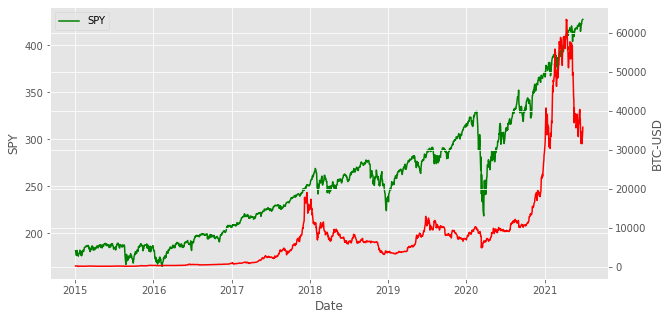

In [3]:
# plot the price movement

fig, ax1 = plt.subplots(figsize=(10,5))

col = 'SPY'
ax1.set_xlabel('Date')
ax1.set_ylabel(col)
ax1.plot(df.index, df[col], color='g', label=col)

col = 'BTC-USD'
ax2 = ax1.twinx()
ax2.set_ylabel(col)
ax2.plot(df.index, df[col], color='r', label=col)

ax1.legend()
plt.show()

<AxesSubplot:xlabel='SPY', ylabel='BTC-USD'>

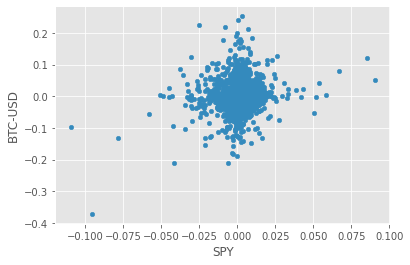

In [4]:
returns = df.pct_change()
returns.plot.scatter('SPY','BTC-USD')

In [5]:
returns.idxmin()

AAPL      2020-03-16
BTC-USD   2020-03-12
F         2020-03-16
GM        2020-03-18
GOOGL     2020-03-16
IVV       2020-03-16
MSFT      2020-03-16
SPY       2020-03-16
dtype: datetime64[ns]

<AxesSubplot:xlabel='Date'>

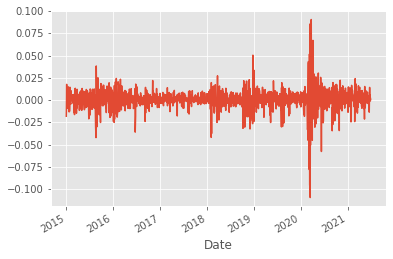

In [6]:
returns['SPY'].plot()

In [7]:
X = sm.add_constant(returns['SPY'])
y = returns['BTC-USD']

estimation = sm.OLS(y,X,missing='drop').fit()
print(estimation.summary())

                            OLS Regression Results                            
Dep. Variable:                BTC-USD   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     33.81
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           7.32e-09
Time:                        00:10:15   Log-Likelihood:                 2690.1
No. Observations:                1629   AIC:                            -5376.
Df Residuals:                    1627   BIC:                            -5365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.001      3.186      0.0

In [8]:
returns.std()

AAPL       0.018575
BTC-USD    0.046899
F          0.020848
GM         0.021925
GOOGL      0.016925
IVV        0.011532
MSFT       0.017322
SPY        0.011334
dtype: float64

In [9]:
X = sm.add_constant(returns[['SPY','IVV']])
y = returns['BTC-USD']

estimation = sm.OLS(y,X,missing='drop').fit()
print(estimation.summary())

                            OLS Regression Results                            
Dep. Variable:                BTC-USD   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     17.66
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           2.59e-08
Time:                        00:10:15   Log-Likelihood:                 2690.9
No. Observations:                1629   AIC:                            -5376.
Df Residuals:                    1626   BIC:                            -5360.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.001      3.206      0.0

In [10]:
returns.corr()

,AAPL,BTC-USD,F,GM,GOOGL,IVV,MSFT,SPY
AAPL,1.000000,0.109860,0.327788,0.351352,0.604443,0.735974,0.687841,0.736673
BTC-USD,0.109860,1.000000,0.078084,0.115132,0.105024,0.143889,0.111601,0.142670
F,0.327788,0.078084,1.000000,0.735244,0.335730,0.591757,0.350326,0.592728
GM,0.351352,0.115132,0.735244,1.000000,0.390613,0.613224,0.383198,0.613522
GOOGL,0.604443,0.105024,0.335730,0.390613,1.000000,0.726833,0.726039,0.728839
IVV,0.735974,0.143889,0.591757,0.613224,0.726833,1.000000,0.801309,0.998966
MSFT,0.687841,0.111601,0.350326,0.383198,0.726039,0.801309,1.000000,0.800455
SPY,0.736673,0.142670,0.592728,0.613522,0.728839,0.998966,0.800455,1.000000
